In [3]:
# This notebook is illustrating the python program 'tft-cutoff.py'
# which is turn into a .exe windows application.
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'proportion (%)')

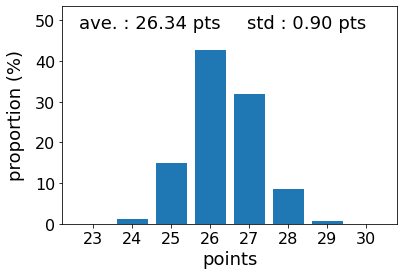

In [2]:
N_joueurs = 32
N_cutoff = 8
N_game = 5
points = np.arange(1,9)

N_sample = 10000
joueurs_par_game = 8
N_lobby = N_joueurs//joueurs_par_game
joueur_id = np.arange(N_joueurs)

point_joueurs = np.zeros((N_sample,N_game,N_joueurs))

rng = np.random.default_rng()
lobby = rng.permuted(np.tile(joueur_id[np.newaxis,np.newaxis],
                             (N_sample,N_game,1)), axis=2)
chan, row, _ = np.indices((N_sample,N_game,N_joueurs))
point_joueurs[chan,row,lobby] = np.tile(points,(N_sample,N_game,N_lobby))

cut_off_point = np.sort(point_joueurs.sum(1))[:,::-1][:,N_cutoff-1]
cut_off_point_m = cut_off_point.mean()
cut_off_point_std = cut_off_point.std()

points_possible = np.unique(cut_off_point)
n_bins = points_possible.shape[0]
count, _ = np.histogram(cut_off_point, bins=n_bins)
points_possible = np.unique(cut_off_point)
freq = 100*count/count.sum()
fig, ax  = plt.subplots(1,1)
ax.bar(points_possible,freq)
ax.text(0.05,0.9,'ave. : %.2f pts'%(cut_off_point_m),
        transform=ax.transAxes, fontsize=18)
ax.text(0.55,0.9,'std : %.2f pts'%(cut_off_point_std),
        transform=ax.transAxes, fontsize=18)
ax.set_ylim(0, 1.25*freq.max())
ax.set_xticks(points_possible)
ax.tick_params(labelsize=16)
ax.set_xlabel('points',fontsize=18)
ax.set_ylabel('proportion (%)',fontsize=18, labelpad =10)